In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file, skipping the header rows
try:
    df = pd.read_csv('C:\\Users\\Harshit\\Downloads\\Code Craft Data Science Internship\\API_SP.POP.TOTL_DS2_en_csv_v2_76253\\API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv', skiprows=4)
except FileNotFoundError:
    print("Error: Main data file not found. Please ensure 'API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv' is in the correct directory.")
    exit()


# Melt the dataframe, keeping only necessary columns
id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
value_vars = [col for col in df.columns if col not in id_vars] # Select the year columns

df_melted = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Population')


# Convert 'Year' to numeric
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')

# Convert 'Population' to numeric and drop rows with NaN values
df_melted['Population'] = pd.to_numeric(df_melted['Population'], errors='coerce')
df_melted = df_melted.dropna(subset=['Population', 'Year'])


# Filter for the most recent year
most_recent_year = df_melted['Year'].max()
df_recent = df_melted[df_melted['Year'] == most_recent_year]

# Now group data for continents analysis, use data from country metadata
country_metadata = pd.read_csv('C:\\Users\\Harshit\\Downloads\\Code Craft Data Science Internship\\API_SP.POP.TOTL_DS2_en_csv_v2_76253\\Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv')
df_recent = df_recent.merge(country_metadata[['Country Code', 'Region']], how='left', on='Country Code')
df_recent = df_recent.dropna(subset=['Region']) # Drop rows without a Region

# Aggregate population data by Region
region_population = df_recent.groupby('Region')['Population'].sum().reset_index()
region_population = region_population.sort_values('Population', ascending=False)


print(region_population)

                       Region    Population
0         East Asia & Pacific  2.361090e+09
5                  South Asia  1.951540e+09
6          Sub-Saharan Africa  1.259902e+09
1       Europe & Central Asia  9.249699e+08
2   Latin America & Caribbean  6.576116e+08
3  Middle East & North Africa  5.083114e+08
4               North America  3.750774e+08


C:\Users\Harshit\AppData\Local\Temp\ipykernel_21852\3550644856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Population', data=region_population, palette='viridis')


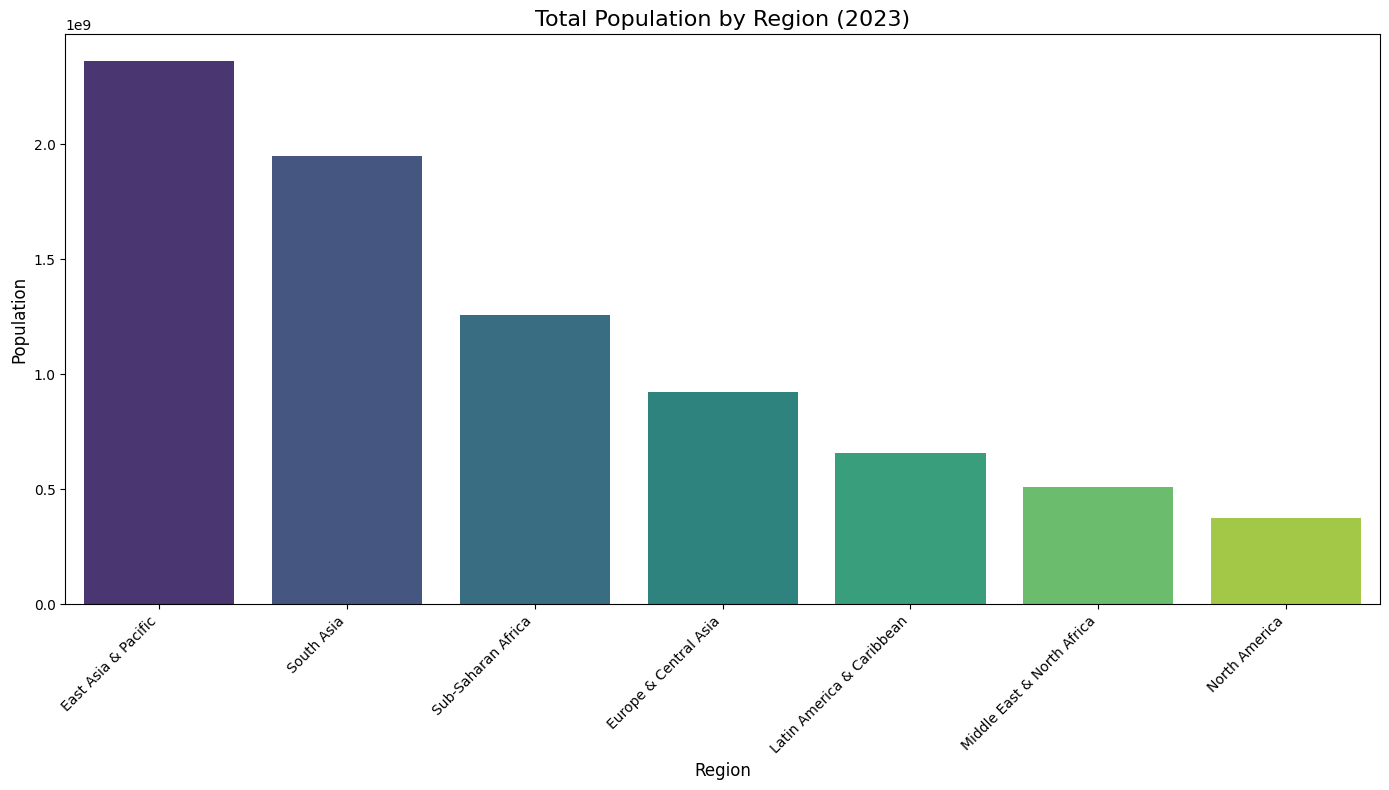

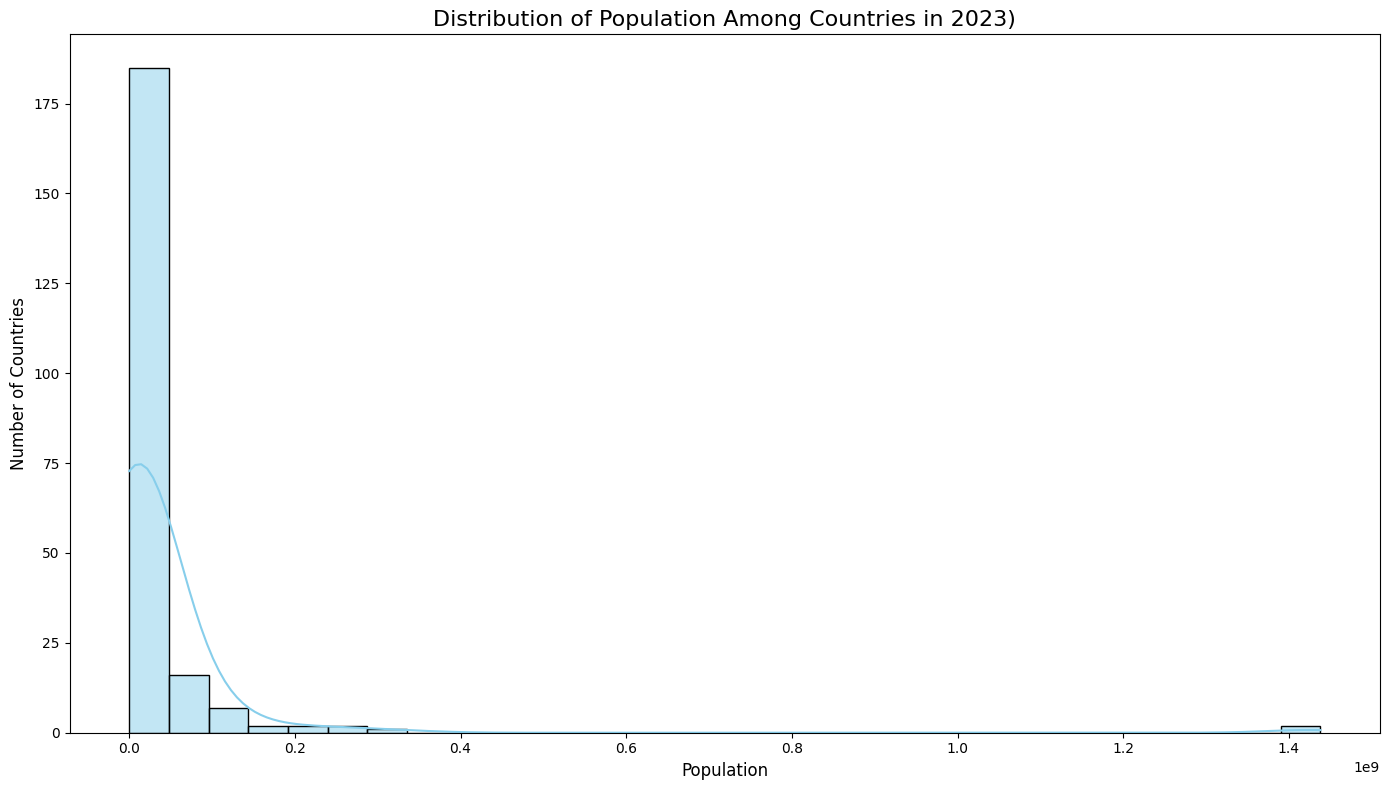

In [8]:
# --- BAR CHART ---
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Population', data=region_population, palette='viridis')
plt.title(f'Total Population by Region ({int(most_recent_year)})', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# --- HISTOGRAM ---
plt.figure(figsize=(14, 8))
sns.histplot(df_recent['Population'], bins=30, kde=True, color='skyblue')
plt.title(f'Distribution of Population Among Countries in {int(most_recent_year)})', fontsize=16)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.tight_layout()
plt.show()

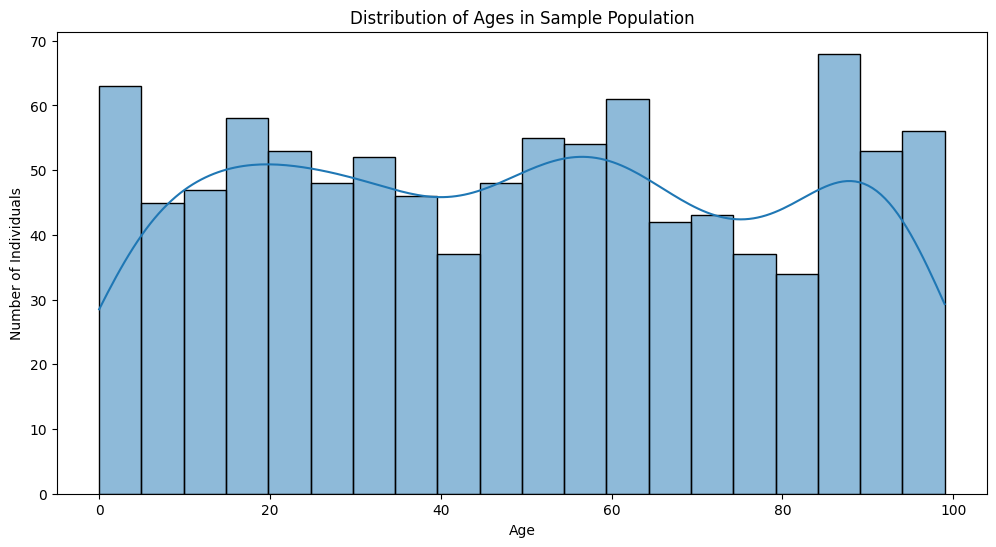

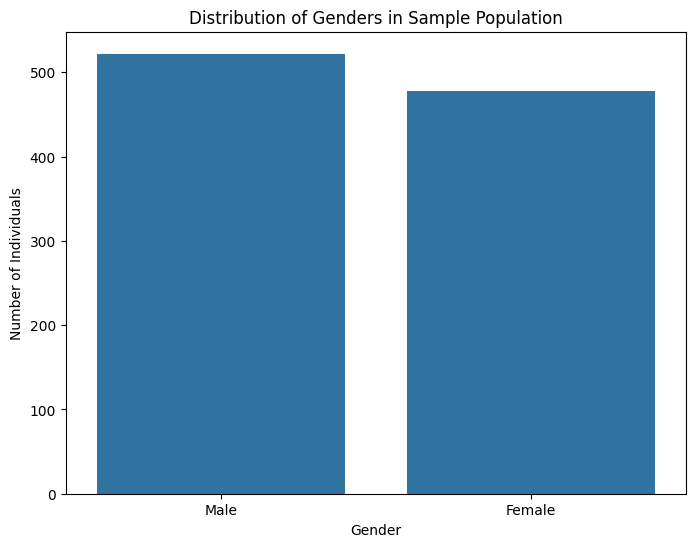

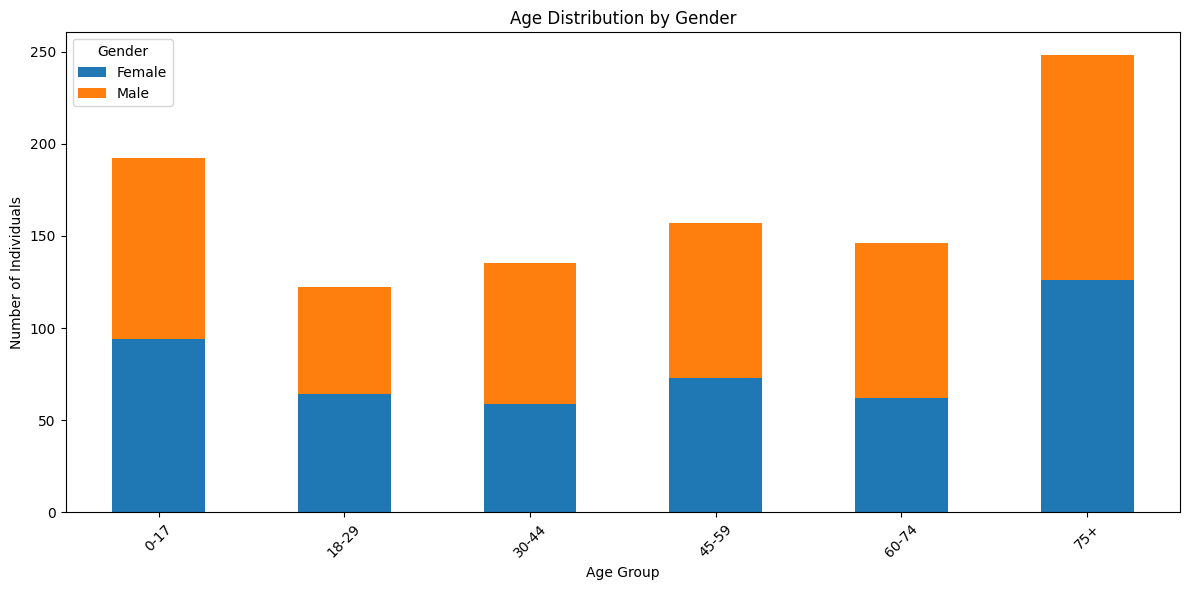

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate synthetic age and gender data
np.random.seed(42)  # for reproducibility

num_individuals = 1000

data = {
    'Age': np.random.randint(0, 100, num_individuals),
    'Gender': np.random.choice(['Male', 'Female'], num_individuals),
    'Country': np.random.choice(['USA', 'Canada', 'UK', 'Germany', 'France', 'China', 'India', 'Brazil', 'Japan', 'Nigeria'], num_individuals) # Added country for potential grouping
}

df = pd.DataFrame(data)

# Create age distribution histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Ages in Sample Population')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.savefig('age_distribution_histogram.png')
plt.show()

# Create gender distribution bar chart
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Genders in Sample Population')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.savefig('gender_distribution_bar_chart.png')
plt.show()

#Stacked bar chart for age distribution grouped by Gender
age_bins = [0, 18, 30, 45, 60, 75, 100]
age_labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a contingency table
gender_age_counts = pd.crosstab(df['Age Group'], df['Gender'])

# Plotting the stacked bar chart
gender_age_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Age Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('age_gender_stacked_bar_chart.png')
plt.show()
